#### MULTIVARIATE LINEAR REGRESSION FROM SCRATCH WITH NUMPY  ####

### Andrew NG Course: Supervised Machine Learning - Regression and Classification - Week 2 ###
 

The code provided implement multivariate linear regression with normalization funcionality

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
class MultivariateLinearRegression:
    def __init__(self, x_data, y_data, operation_type): #operation = 1 -> normalized ; operaration =  0 -> not normalized
        self.x_data = x_data
        self.y_data = y_data
        self.normalized_x = 0
        self.operation_type = operation_type
        self.w = np.ones(x_data.shape[1])
        self.b = 1

    def normalize_data(self):
        max_values = np.max(self.x_data, axis=0)
        self.normalized_x = self.x_data/ max_values
        
    def gradient_descent(self, learning_rate): 
        m = self.x_data.shape[0]
    
        if self.operation_type == 0:
            data = self.x_data
        elif self.operation_type == 1:
            data = self.normalized_x
            
        y_prediction = np.dot(data, self.w) + self.b 
        error = y_prediction - self.y_data
        
        dw = (1/m) * np.dot(data.T, error)
        db = (1/m) * np.sum(error)

        self.w = self.w - learning_rate * dw
        self.b = self.b - learning_rate * db

    def calculate_cost(self):
        m = self.x_data.shape[0]

        if self.operation_type == 0:
            data = self.x_data
        elif self.operation_type == 1:
            data = self.normalized_x
            

        y_prediction = np.dot(data, self.w) + self.b 
        error = y_prediction - self.y_data
        cost = (1/(2*m)) * np.sum(error * error)

        return cost

    def get_parameters(self, epochs, learning_rate):
        if self.operation_type == 1:
            self.normalize_data()
        
        costs = []
        for i in range(epochs):
            self.gradient_descent(learning_rate)

            costs.append(self.calculate_cost())

        print("w = {}, b = {}, cost = {}".format(self.w, self.b, self.calculate_cost()))

        return costs
    
    def make_prediction(self, values):
        if self.operation_type == 0:
            x = values
        elif self.operation_type == 1:
            max_values = np.max(self.x_data, axis=0)
            x = values/max_values
            

        y_prediction = np.sum(np.dot(x, self.w)) + self.b 

        return y_prediction


w = [2.00000001 2.00000001], b = 2.9999999599055016, cost = 1.4618501772257244e-16


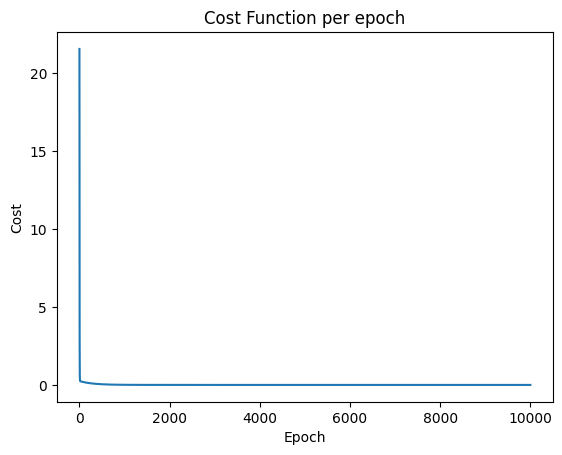

6.99999997092817

In [69]:
#function -> y = 2x1 + 2x2 + 3
epochs = 10000
x_data = np.array([[1,1],[2,2],[3,3], [4,4], [5,5]])
y_data = np.array([7, 11, 15, 19, 23])
#y_prediction = np.dot(x_data, w) + b  

l1 = MultivariateLinearRegression(x_data, y_data,0)
costs = l1.get_parameters(epochs, 0.01)


plt.title("Cost Function per epoch")
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.plot(np.arange(epochs), costs)
plt.show()
l1.make_prediction([1,1])



In [73]:
#this example only works with normalization 

X_d = np.array([[150, 3, 10, 2.5],
                [200, 4, 15, 3.2],
                [120, 2, 5, 1.8],
                [180, 3, 12, 2.9],
                [250, 4, 20, 4.1],
                [300, 5, 25, 3.8],
                [220, 3, 8, 2.1],
                [260, 4, 18, 3.6],
                [180, 2, 7, 1.9],
                [240, 4, 16, 3.0]])
Y_d = np.array([1.2, 1.8, 0.9, 1.5, 2.3, 2.8, 1.6, 2.1, 1.0, 1.9])

# l2 = MultivariateLinearRegression(X_d, Y_d, 1) #not normalized multivariate linear regression -> doesn't work
l2 = MultivariateLinearRegression(X_d, Y_d, 1) #normalized multivariate linear regression

l2.get_parameters(1000, 0.01)
l2.make_prediction([150,4,10,2.5])



w = [0.58958391 0.58922882 0.75491985 0.53071062], b = 0.1272071235663402, cost = 0.009261152881106639


1.5189541077596196